In [1]:
pip install sympy matplotlib

: 

: 

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LightSource
from IPython.display import display, Math
from mpl_toolkits.mplot3d import Axes3D  # Importar Axes3D



In [3]:
# Definición de variables
x, y = sp.symbols('x y')

# Definir las funciones de dos variables
function_u = x**2 - y**2  # Función u(x, y)
function_v = 2*x*y       # Función v(x, y)

# Calcular las derivadas parciales de u
partial_u_x = sp.diff(function_u, x)  # Derivada parcial de u con respecto a x
partial_u_y = sp.diff(function_u, y)  # Derivada parcial de u con respecto a y

# Calcular las derivadas parciales de v
partial_v_x = sp.diff(function_v, x)  # Derivada parcial de v con respecto a x
partial_v_y = sp.diff(function_v, y)  # Derivada parcial de v con respecto a y

# Mostrar las derivadas parciales de u
print("Derivadas parciales de u(x,y):")
display(Math(r"\dfrac{\partial u}{\partial x} = " + sp.latex(partial_u_x)))
display(Math(r"\dfrac{\partial u}{\partial y} = " + sp.latex(partial_u_y)))

# Mostrar las derivadas parciales de v
print("Derivadas parciales de v(x,y):")
display(Math(r"\dfrac{\partial v}{\partial x} = " + sp.latex(partial_v_x)))
display(Math(r"\dfrac{\partial v}{\partial y} = " + sp.latex(partial_v_y)))

# Generar la matriz jacobiana
jacobian_matrix = sp.Matrix([[partial_u_x, partial_u_y], [partial_v_x, partial_v_y]])

# Mostrar la matriz jacobiana en formato LaTeX
display(Math(r"J = " + sp.latex(jacobian_matrix)))

Derivadas parciales de u(x,y):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Derivadas parciales de v(x,y):


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Convertir las funciones simbólicas a funciones numéricas
numeric_u = sp.lambdify([x, y], function_u, 'numpy')
numeric_v = sp.lambdify([x, y], function_v, 'numpy')

# Convertir las derivadas parciales de u a funciones numéricas
numeric_u_x = sp.lambdify([x, y], partial_u_x, 'numpy')
numeric_u_y = sp.lambdify([x, y], partial_u_y, 'numpy')

# Convertir las derivadas parciales de v a funciones numéricas
numeric_v_x = sp.lambdify([x, y], partial_v_x, 'numpy')
numeric_v_y = sp.lambdify([x, y], partial_v_y, 'numpy')

# Generar datos para las gráficas
x_range = np.linspace(-10, 10, 25)  # Rango de valores para x
y_range = np.linspace(-10, 10, 25)  # Rango de valores para y
X, Y = np.meshgrid(x_range, y_range)  # Crear malla de valores

# Evaluar la función u en los datos generados
Z_u = numeric_u(X, Y)
Z_u_x = numeric_u_x(X, Y)
Z_u_y = numeric_u_y(X, Y)

# Evaluar la función v en los datos generados
Z_v = numeric_v(X, Y)
Z_v_x = numeric_v_x(X, Y)
Z_v_y = numeric_v_y(X, Y)

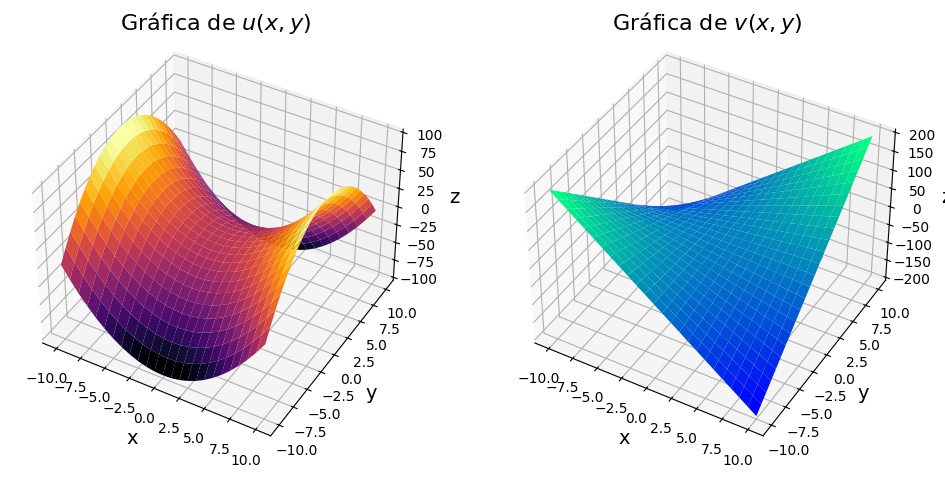

In [6]:
# Crear figura
fig = plt.figure(figsize=(18, 15))  # Ajusta el tamaño si es necesario

# Graficar la función u(x, y) en 3D
ax_3d_u = fig.add_subplot(231, projection='3d')
ax_3d_u.plot_surface(X, Y, Z_u, cmap="inferno", edgecolor='none')
ax_3d_u.set_title('Gráfica de $u(x,y)$', fontsize=16)
ax_3d_u.set_xlabel('x', fontsize=14)
ax_3d_u.set_ylabel('y', fontsize=14)
ax_3d_u.set_zlabel('z', fontsize=14)
ax_3d_u.view_init(elev=40)

# Graficar la función v(x, y) en 3D
ax_3d_v = fig.add_subplot(232, projection='3d')
ax_3d_v.plot_surface(X, Y, Z_v, cmap="winter", edgecolor='none')
ax_3d_v.set_title('Gráfica de $v(x,y)$', fontsize=16)
ax_3d_v.set_xlabel('x', fontsize=14)
ax_3d_v.set_ylabel('y', fontsize=14)
ax_3d_v.set_zlabel('z', fontsize=14)
ax_3d_v.view_init(elev=40)

plt.show()


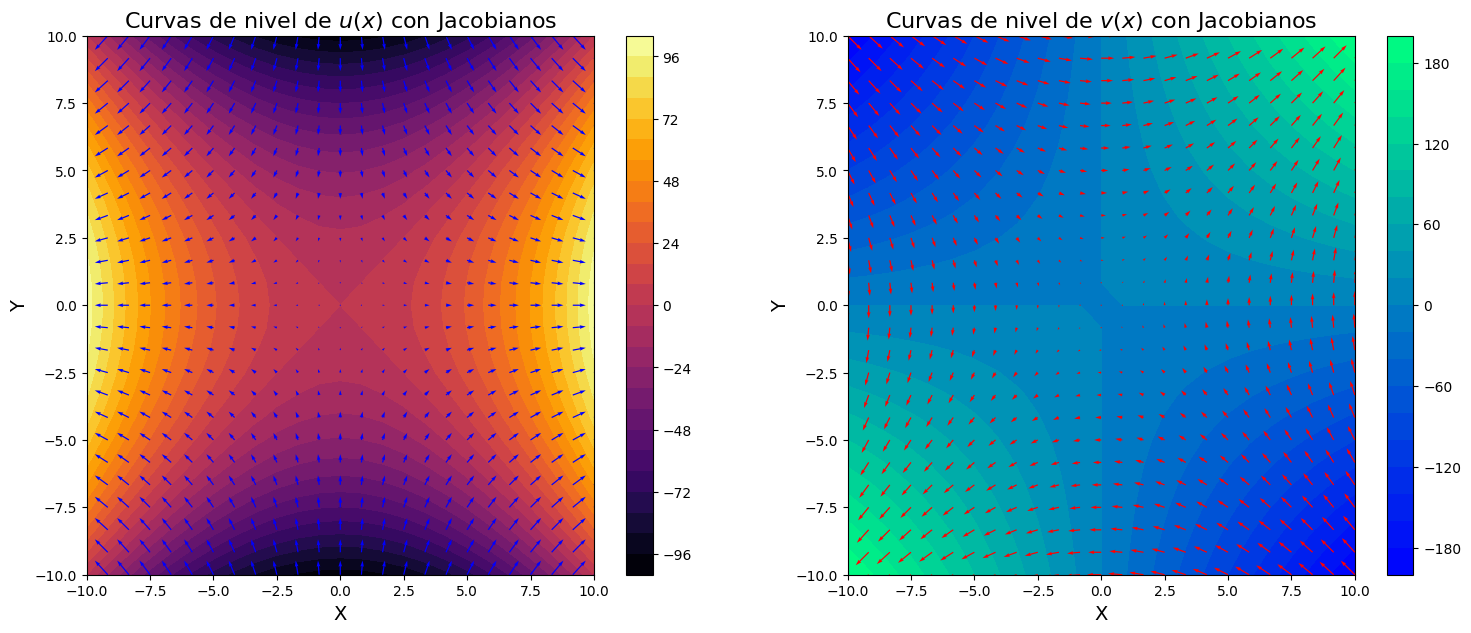

In [9]:
# Graficar curvas de nivel para u(x,y) con jacobianos
fig2 = plt.figure(figsize=(18, 7))

c_f_2d_u = fig2.add_subplot(121)
contour = c_f_2d_u.contourf(X, Y, Z_u, levels=25, cmap='inferno')
c_f_2d_u.quiver(X, Y, Z_u_x, Z_u_y, color='blue')
c_f_2d_u.set_title('Curvas de nivel de $u(x)$ con Jacobianos', fontsize=16)
c_f_2d_u.set_xlabel('X', fontsize=14)
c_f_2d_u.set_ylabel('Y', fontsize=14)
fig2.colorbar(contour, ax=c_f_2d_u)

# Graficar curvas de nivel para v(x,y) con jacobianos
c_f_2d_v = fig2.add_subplot(122)
contour = c_f_2d_v.contourf(X, Y, Z_v, levels=25, cmap='winter')
c_f_2d_v.quiver(X, Y, Z_v_x, Z_v_y, color='red')
c_f_2d_v.set_title('Curvas de nivel de $v(x)$ con Jacobianos', fontsize=16)
c_f_2d_v.set_xlabel('X', fontsize=14)
c_f_2d_v.set_ylabel('Y', fontsize=14)
fig2.colorbar(contour, ax=c_f_2d_v)

plt.show()

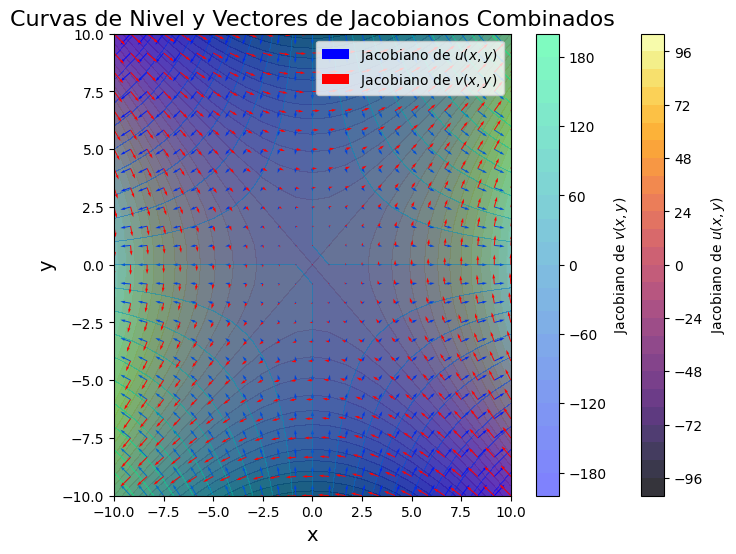

In [11]:
# Graficar Jacobianos combinados
fig3 = plt.figure(figsize=(8, 6))

combined = fig3.add_subplot(111)
contour_u = combined.contourf(X, Y, Z_u, levels=25, cmap='inferno', alpha=0.8)
quiver_u = combined.quiver(X, Y, Z_u_x, Z_u_y, color='blue', label='Jacobiano de $u(x,y)$')
contour_v = combined.contourf(X, Y, Z_v, levels=25, cmap='winter', alpha=0.5)
quiver_v = combined.quiver(X, Y, Z_v_x, Z_v_y, color='red', label='Jacobiano de $v(x,y)$')

# Añadir leyenda
combined.legend(loc='upper right')

# Añadir barras de color
fig3.colorbar(contour_u, ax=combined, orientation='vertical', label='Jacobiano de $u(x,y)$')
fig3.colorbar(contour_v, ax=combined, orientation='vertical', label='Jacobiano de $v(x,y)$')

# Configuración del gráfico combinado
combined.set_title('Curvas de Nivel y Vectores de Jacobianos Combinados', fontsize=16)
combined.set_xlabel('x', fontsize=14)
combined.set_ylabel('y', fontsize=14)

plt.show()